In [54]:
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
#cargamos df limpiado local
compras_df = pd.read_csv('data/clean_compras.csv')

In [56]:
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Visión general del dataset

In [57]:
# qué columnas de datos tenemos
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [58]:
# miramos los tipos de variables
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [59]:
# resumen cálculo de las variables numéricas
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [60]:
# Solo trabajaremos con las siguientes columnaas:
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP','FECHA', 'IMPORTE', 'SHEET']]

## Análisis unidimensional de las variables

In [61]:
# Contamos los datos únicos que tiene la columna 'SHEETS'
# Es decir cuantos datos datos tienen cada hoa o sheet que importamos del excel
compras_df['SHEET'].value_counts()


SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64

In [62]:
# Cantidad de observaciones o datos únicos de column CONCEPTO
len(compras_df['CONCEPTO'].unique())

1396

In [63]:
# Cantidad de facturas que ha hecho los 10 mayores proveedores o beneficiarios
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: count, dtype: int64

<Axes: >

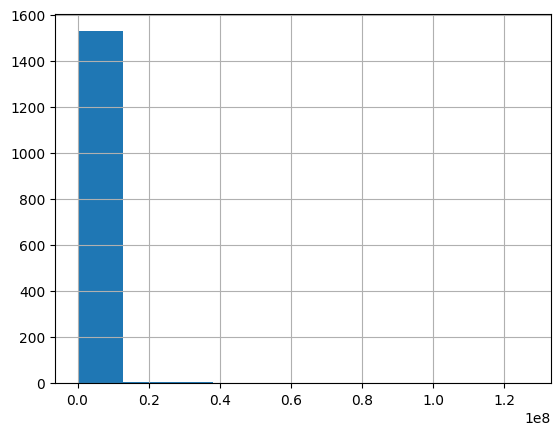

In [64]:
# Análisis numérico mediante histograma variable numérica 'IMPORTE'
compras_df['IMPORTE'].hist()

<Axes: >

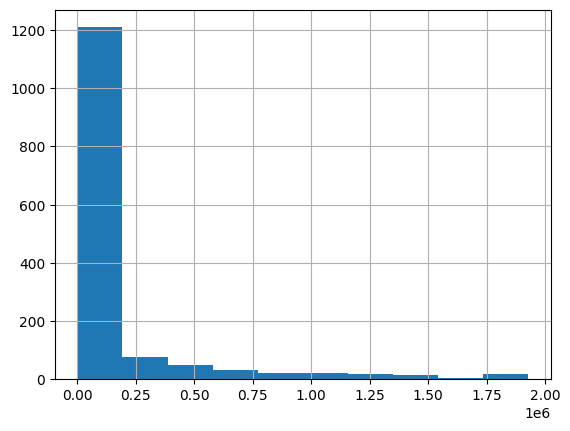

In [65]:
# Análisis numérico mediante histograma variable numérica 'IMPORTE'
# Haciendo zoom en el quentil 5%
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

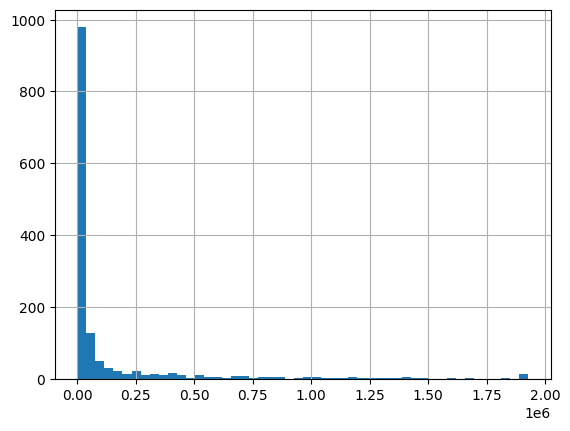

In [66]:
# Análisis numérico mediante histograma variable numérica 'IMPORTE'
# Haciendo zoom en el quentil 5%
# con 50 bins o separaciones
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [75]:
# Revisamos los datos del 5% de los datos mayores de 'IMPORTE' 
# mostrando solo los 5 primeros resgistros.
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Análisis multidimensional de las variables

In [68]:
# Analizar los beneficiarios o proveedores con mayores importes
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [69]:
print(sum_importe_beneficiario)

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64


<Axes: xlabel='BENEFICIARIO'>

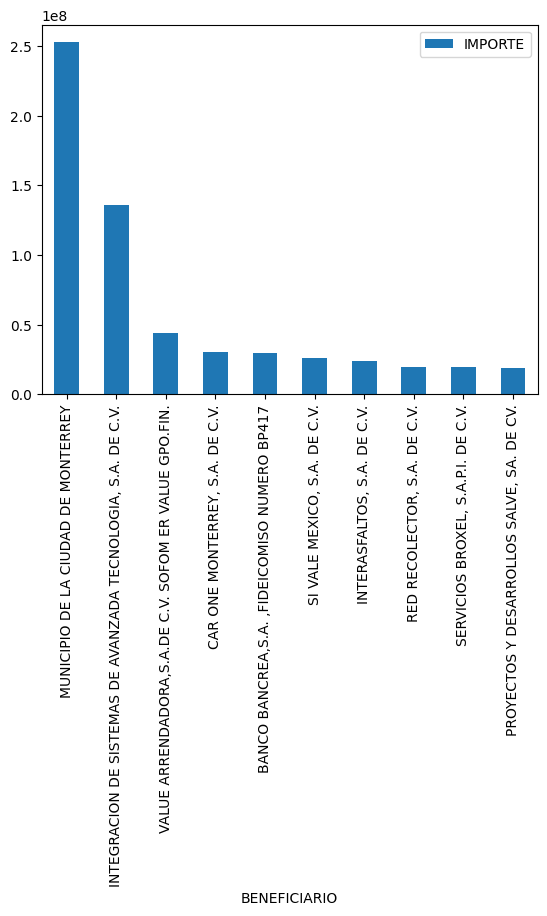

In [70]:
# Analizamos los beneficiarios con mayores importes, reseteamos index, ordenamos desc, dejamos top 10, 
# y graficamos bar, x=beneficiario y=importe
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [78]:
# Revisamos la media de IMPORTE, agrupado por var SHEET o tipo de contrato
mean_importe_sheet = compras_df.groupby(['SHEET'])['IMPORTE'].mean()

<Axes: xlabel='SHEET'>

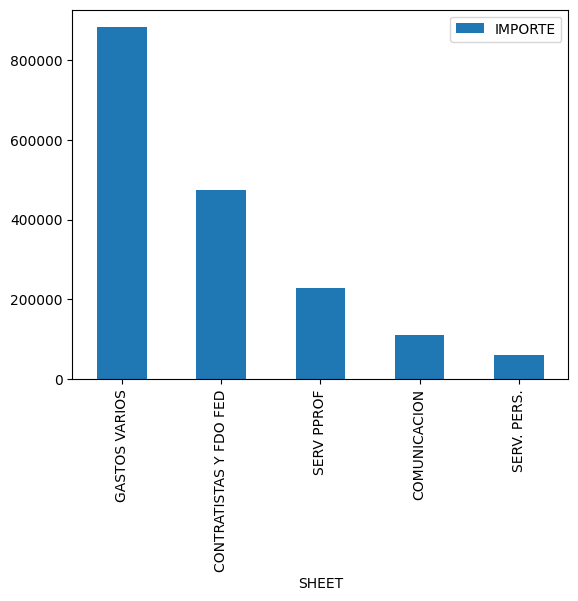

In [79]:
# Graficamos bar x=SHEET y=IMPORTE, top 10 ordenando descendente mean_importe_sheet
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [80]:
# Miramos los datos top 10 ordenando descendente mean_importe_sheet
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [84]:
# Agrupamos por fechas y sumamos sus importes
sum_importe_fecha = compras_df.groupby('FECHA')['IMPORTE'].sum()
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [88]:
# revisamos solo los datos con coumn SHEET = GATOS VARIOS
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

<Axes: >

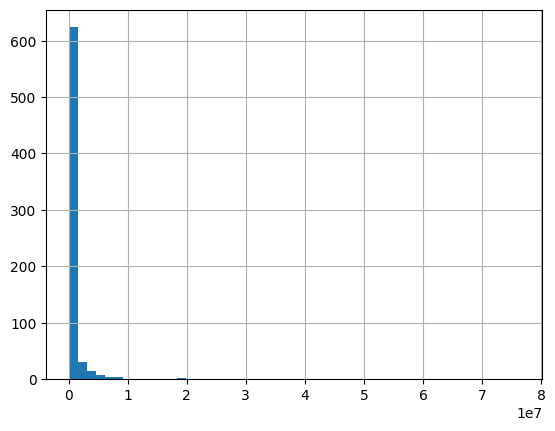

In [89]:
# Graficamos histograma de GASTOS VARIOS VS IMPORTE
compras_gastos_df['IMPORTE'].hist(bins=50)

In [91]:
# Filtramos compras_gastos_df por 'BENEFICIARIO' = "MUNICIPIO DE LA CIUDAD DE MONTERREY"
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [92]:
# Revisamos de compras_df los datos cuya columna BENEFICIARIO ==  "MUNICIPIO DE LA CIUDAD DE MONTERREY",
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [115]:
# contar cuantos SHEET tipos de contratos, tienen los BENEFICIARIOS == "MUNICIPIO DE LA CIUDAD DE MONTERREY" 
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

SHEET
GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: count, dtype: int64

In [118]:
# creamos matriz BENEFICIARIO - SHEET tipo de contrato
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

In [119]:
compras_sheet_beneficiario

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [120]:
# Revisar el top 10 BENEFICIARIOS que gastaron más, es decir con mayor suma de IMPORTE
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]
top_beneficiarios

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.',
       'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.',
       'CAR ONE MONTERREY, S.A. DE C.V.',
       'BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417',
       'SI VALE MEXICO, S.A. DE C.V.', 'INTERASFALTOS, S.A. DE C.V.',
       'RED RECOLECTOR, S.A. DE C.V.', 'SERVICIOS BROXEL, S.A.P.I. DE C.V.',
       'PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.'],
      dtype='object', name='BENEFICIARIO')

<Axes: xlabel='BENEFICIARIO'>

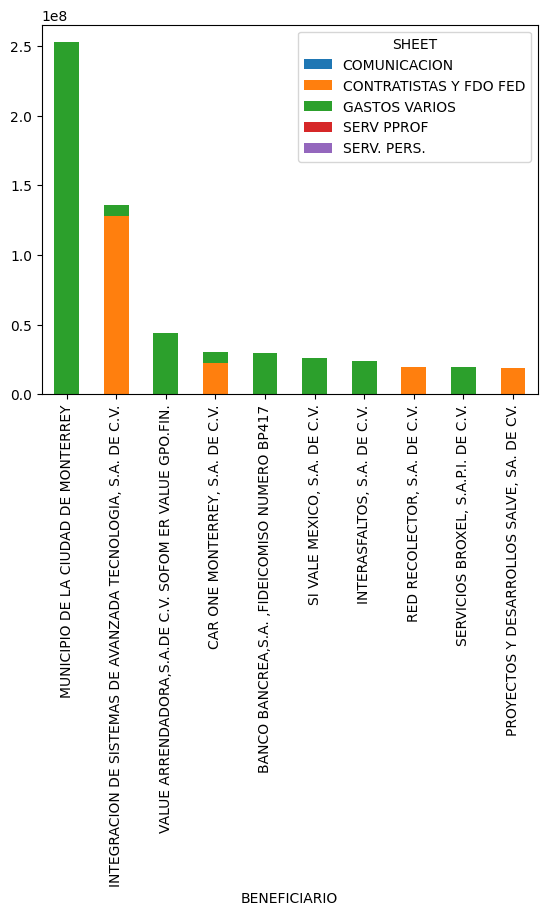

In [121]:
# Graficamos X=BENEFICIARIOS, y= importe
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)


## Análisis de texto

In [128]:
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /home/jam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
# Extraer el texto de 'CONCEPTO' compras_df
textos_compras = ''
for row in compras_df['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row
textos_compras

' REEMPLAZO E INSTALACION DE AMORTIGUADORES (DELANTEROS Y TRASEROS), ROTULAS SUPERIORES Y ALINEACION.PATRIMONIO 82357 2017 RAM 4000 REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE TUERCAS. PATRIMONIO 80383 2010 RAM 4000 REEMPLAZO DE DOS RINES  (17). PATRIMONIO 80383 2010 RAM 4000 REEMPLAZO DE  DOS RINES  (14). PATRIMONIO 80072 2010 PICK UP ESTACAS REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO 82646 2017 AVEO COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., AGOSTO 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE Y OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., SEPTIEMBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS PARA LA DIR. DE MTTO., OCTUBRE 2020, RAMO 28 COMPRA E INSTALACION DE LLANTAS 

In [131]:
# haremos unas stopwords para ignorar
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [138]:
#quitamos palabras cortas < 4
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

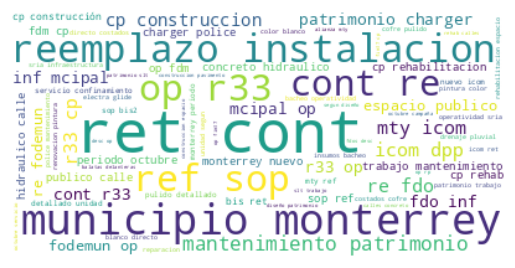

In [141]:
wc = WordCloud(background_color = 'white')
wc.generate(textos_compras)

plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()